In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pickle

# CIFAR-10 veri setini yükleme fonksiyonu
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Eğitim ve test verilerini birleştirme
data_batches = [
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5'
]

x_train_list = []
y_train_list = []

for file in data_batches:
    batch_file = unpickle(file)
    x_train_list.append(batch_file[b'data'])
    y_train_list.extend(batch_file[b'labels'])

test_batch = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch')
x_test = test_batch[b'data']
y_test = np.array(test_batch[b'labels'])

x_train = np.concatenate(x_train_list)
y_train = np.array(y_train_list)

# Görüntü boyutunu yeniden şekillendirme (32x32x3)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Etiketleri kategorik hale getirme (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Pixel değerlerini 0-1 arasına normalize etme
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Eğitim verisi boyutu:", x_train.shape)
print("Eğitim etiketleri boyutu:", y_train.shape)
print("Test verisi boyutu:", x_test.shape)
print("Test etiketleri boyutu:", y_test.shape)

2025-09-25 09:01:44.041774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758790904.289426      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758790904.356064      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Eğitim verisi boyutu: (50000, 32, 32, 3)
Eğitim etiketleri boyutu: (50000, 10)
Test verisi boyutu: (10000, 32, 32, 3)
Test etiketleri boyutu: (10000, 10)


In [2]:
print('Eğitim verisi boyutu:', x_train.shape)
print('Test verisi boyutu:', x_test.shape)
print('Eğitim etiketleri boyutu:', y_train.shape)
print('Test etiketleri boyutu:', y_test.shape)

Eğitim verisi boyutu: (50000, 32, 32, 3)
Test verisi boyutu: (10000, 32, 32, 3)
Eğitim etiketleri boyutu: (50000, 10)
Test etiketleri boyutu: (10000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN modelini oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# İlk Dropout katmanını ekledim
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# İkinci Dropout katmanını ekledim
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Üçüncü Dropout katmanını ekledim (Dense katmanından önce)
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-25 09:02:03.536523: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri çoğaltma için ImageDataGenerator'ı oluşturma
datagen = ImageDataGenerator(
    rotation_range=15,       
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    horizontal_flip=True,    
    )

datagen.fit(x_train)

# Modeli çoğaltılmış verilerle eğitme
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,  
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.1440 - loss: 2.2373 - val_accuracy: 0.2891 - val_loss: 1.8843
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.2598 - loss: 1.9588 - val_accuracy: 0.3161 - val_loss: 1.8557
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.2864 - loss: 1.9018 - val_accuracy: 0.3408 - val_loss: 1.8152
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.3092 - loss: 1.8524 - val_accuracy: 0.3637 - val_loss: 1.7384
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.3193 - loss: 1.8227 - val_accuracy: 0.4016 - val_loss: 1.6540
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.3270 - loss: 1.8021 - val_accuracy: 0.3740 - val_loss: 1.7326
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.3390 - loss: 1.7914 - val_accuracy: 0.4258 - val_loss: 1.6011
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.3490 - loss: 1.7701 - val_accurac

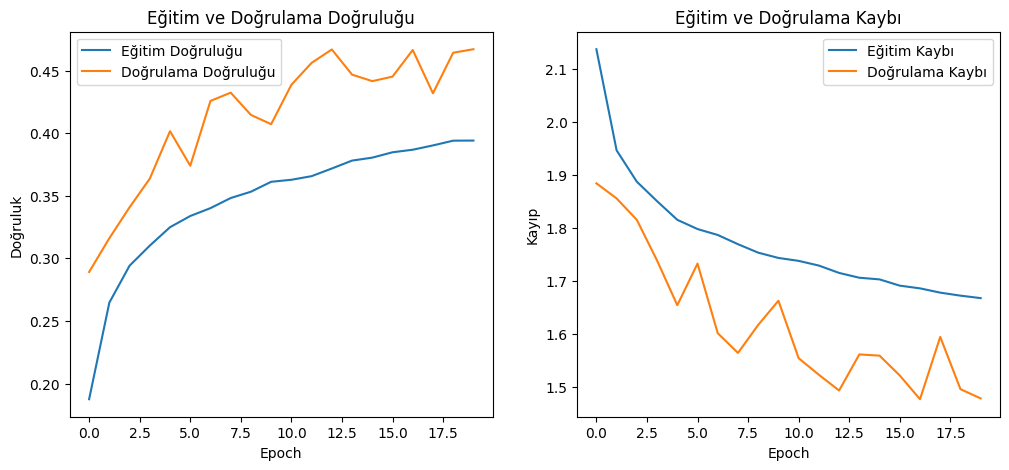

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


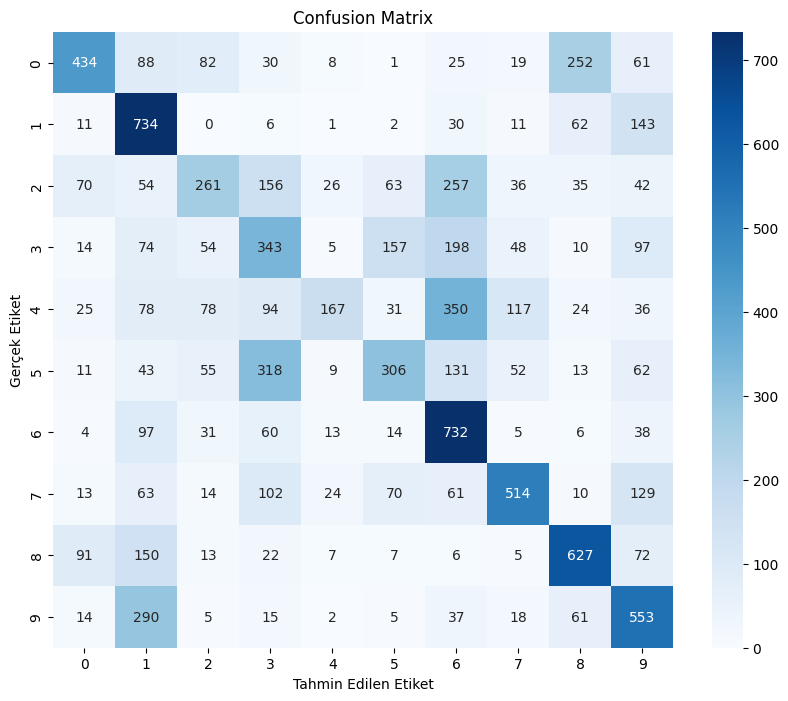

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.63      0.43      0.51      1000
           1       0.44      0.73      0.55      1000
           2       0.44      0.26      0.33      1000
           3       0.30      0.34      0.32      1000
           4       0.64      0.17      0.26      1000
           5       0.47      0.31      0.37      1000
           6       0.40      0.73      0.52      1000
           7       0.62      0.51      0.56      1000
           8       0.57      0.63      0.60      1000
           9       0.45      0.55      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Epoch bazlı Accuracy ve Loss grafiklerini çizme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

# Confusion Matrix ve Sınıflandırma Raporu
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred))

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.4399 - loss: 1.5510 - val_accuracy: 0.5288 - val_loss: 1.3214
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4615 - loss: 1.4988 - val_accuracy: 0.5526 - val_loss: 1.2791
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4734 - loss: 1.4656 - val_accuracy: 0.5492 - val_loss: 1.2702
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.4870 - loss: 1.4398 - val_accuracy: 0.5478 - val_loss: 1.2777
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4936 - loss: 1.4237 - val_accuracy: 0.5696 - val_loss: 1.2365
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4964 - loss: 1.4091 - val_accuracy: 0.5708 - val_loss: 1.2401
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5045 - loss: 1.3852 - val_accuracy: 0.5684 - val_loss: 1.2253
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5097 - loss: 1.3849 - 

In [7]:
# Modeli eğitme
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5164 - loss: 1.3572 - val_accuracy: 0.5863 - val_loss: 1.1850
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5237 - loss: 1.3387 - val_accuracy: 0.5855 - val_loss: 1.1803
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5280 - loss: 1.3265 - val_accuracy: 0.5815 - val_loss: 1.1824
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5307 - loss: 1.3233 - val_accuracy: 0.5818 - val_loss: 1.2036
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5320 - loss: 1.3169 - val_accuracy: 0.5878 - val_loss: 1.1733
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5319 - loss: 1.3093 - val_accuracy: 0.6066 - val_loss: 1.1457
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5377 - loss: 1.2984 - val_accuracy: 0.5977 - val_loss: 1.1464
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5466 - loss: 1.2736 - 